# THE SPARKS FOUNDATION : COMPUTER VISION AND IOT
# TASK_2 :- COLOR IDENTIFICATION IN IMAGES
# Name: Narmada Haribhau Ugale

## Import Necessary Libraries

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import numpy as np
%matplotlib inline
import cv2
import os


The type of this input is <class 'numpy.ndarray'>
Shape: (3159, 5616, 3)


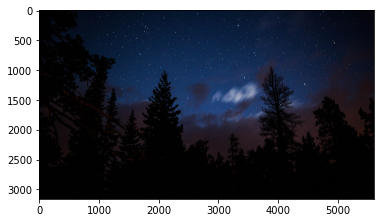

In [ ]:
image = cv2.imread(r'/content/drive/MyDrive/opencv/a.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

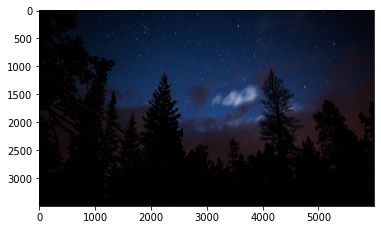

In [ ]:
resized_image = cv2.resize(image, (6000,3500))
plt.imshow(resized_image)

# Color Identification of the Selected Image

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

## Get Colors from an image

In [ ]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_

    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

[array([156.67049904, 170.80611518,   5.11959849]),
 array([ 55.21101957, 165.35783096, 247.31075367]),
 array([49.07494769, 89.95860757,  2.9500856 ]),
 array([  2.4186427 , 100.50642039, 231.56710209]),
 array([120.04584109, 193.40775087, 242.66003888]),
 array([176.71303997, 218.40312012, 233.70096779]),
 array([104.73010226, 132.62025494,   3.38069758]),
 array([  0.92540292,  48.86982226, 178.10430788])]

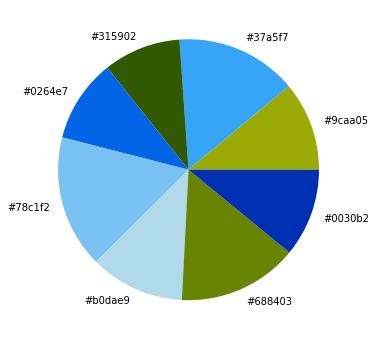

In [ ]:
get_colors(get_image(r'/content/drive/MyDrive/opencv/d.jpg'), 8, True)

# Searching Images using Color

In [ ]:
IMAGE_DIRECTORY = r'/content/drive/MyDrive/opencv'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
   
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

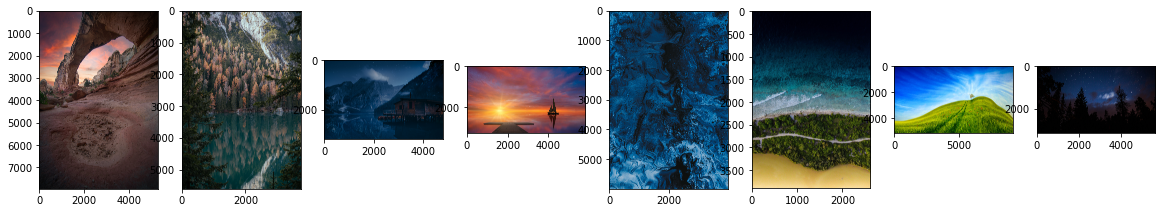

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [ ]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [ ]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

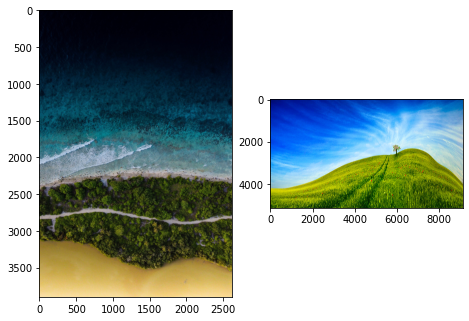

In [ ]:

plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)


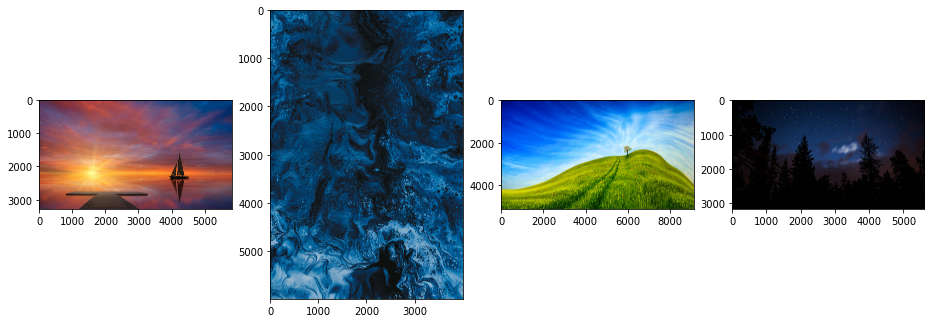

In [ ]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

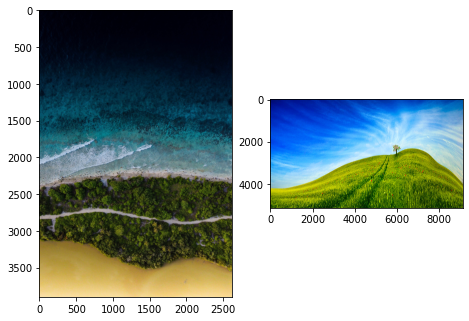

In [ ]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)